# OpenFOAM AI solution control algorithms for pressure-velocity coupling

## Global settings 

**Path to the case that contains the CSV file with data**

In [1]:
import os
import pandas as pd
import os
from matplotlib import pyplot as plt 
from matplotlib import rcParams
rcParams["figure.dpi"] = 300
rcParams["font.size"] = 8

# Data
case_path = "contactAngleCavity" # Path to ai_solution_control.csv file. 
csv_file_path = os.path.join(case_path, "ai-solution-control.csv")
print(csv_file_path)
data=pd.read_csv(csv_file_path)

contactAngleCavity/ai-solution-control.csv


## Visualization and modeling of the reward function

### Individual Diagrams
#### CPU Time

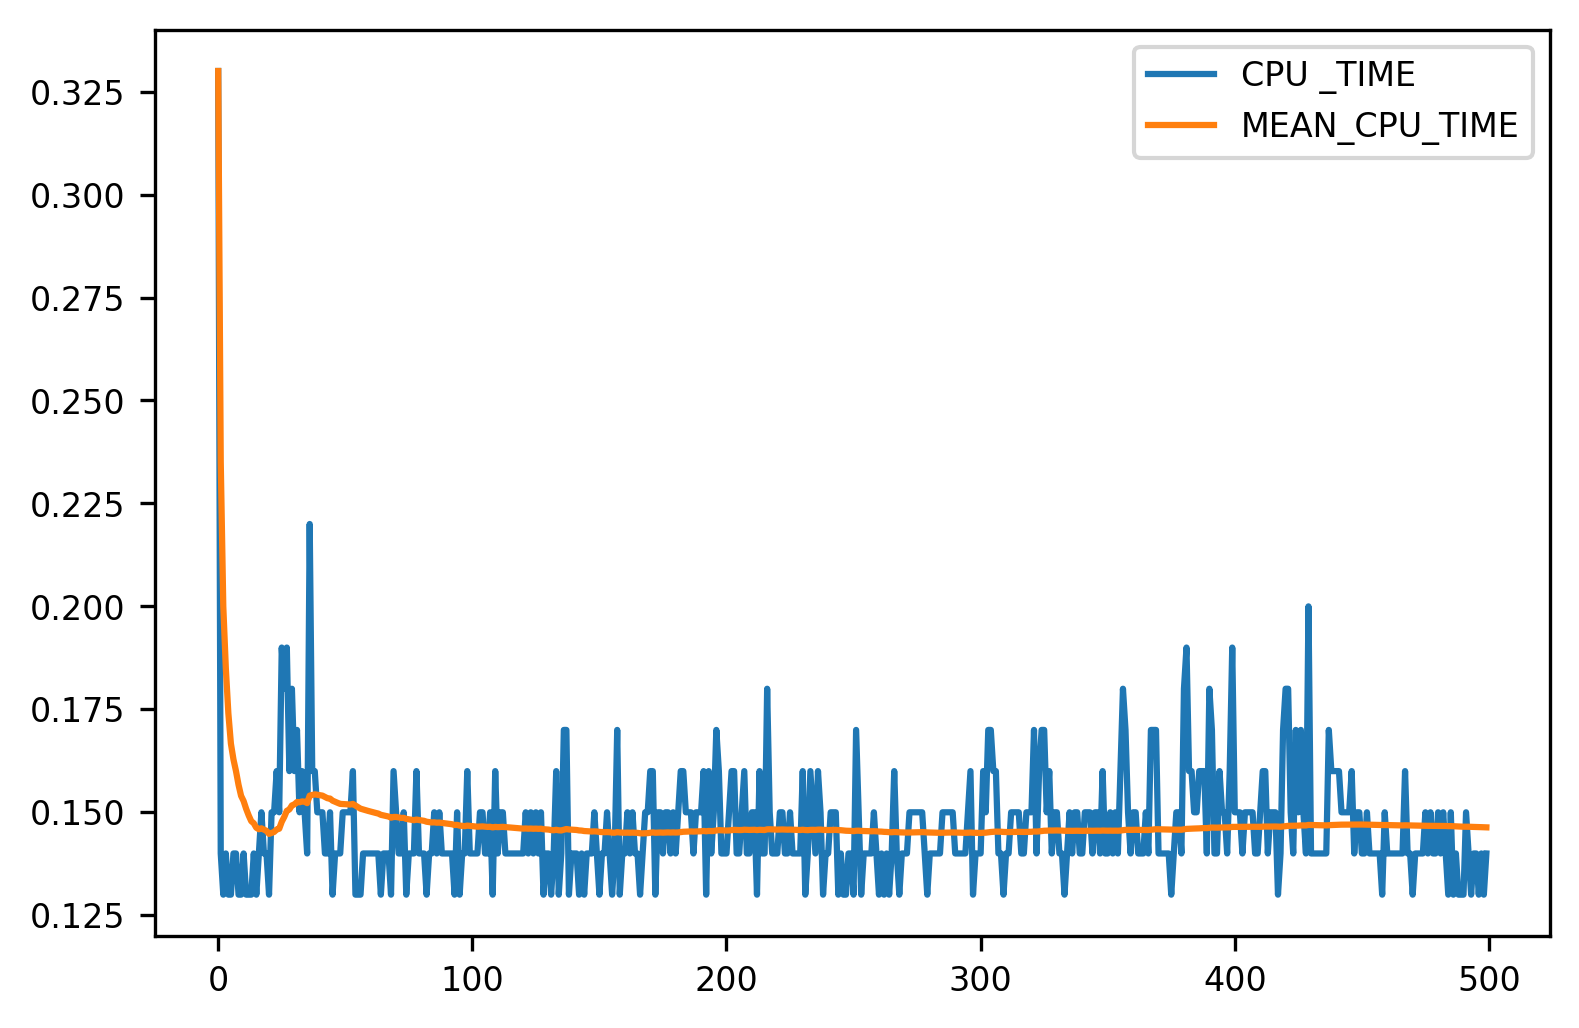

In [2]:
# CPU Time
plt.plot(data["CPU_TIME"], label="CPU _TIME")
plt.plot(data["MEAN_CPU_TIME"], label="MEAN_CPU_TIME")
plt.legend()

CPU Time varies strongly from one time step to the next. This will only get worse in parallel computations if load imbalances occur. The running mean can be used as a smoothed reward signal, but it should be normalized.

#### Running scaled mean CPU time compared to pandas-scaled mean CPU time

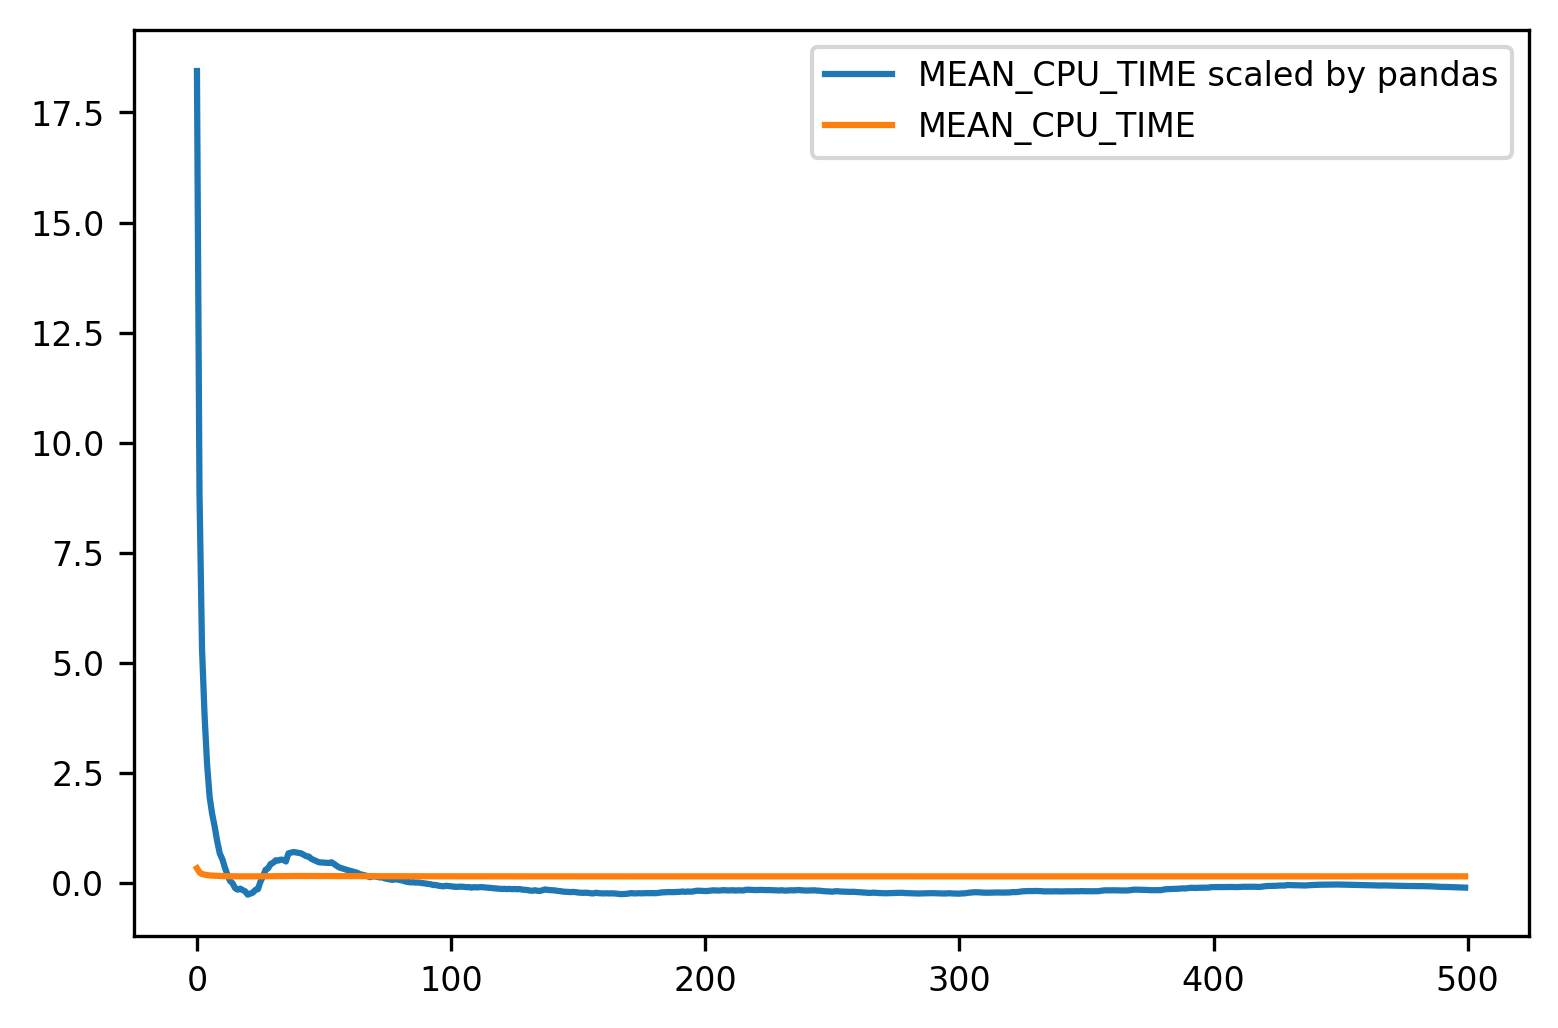

In [3]:
mean_cpu_time = data["MEAN_CPU_TIME"]
mean_cpu_time_scaled = (mean_cpu_time - mean_cpu_time.mean())/ mean_cpu_time.std()
plt.plot(mean_cpu_time_scaled, label="MEAN_CPU_TIME scaled by pandas")
#plt.plot(data["SCALED_CPU_TIME"], label="SCALED_CPU_TIME")
plt.plot(data["MEAN_CPU_TIME"], label="MEAN_CPU_TIME")

plt.legend()

#### Maximal residual

In [4]:
plt.plot(data["MAX_RESIDUAL"], label="MAX RESIDUAL")
plt.legend()

The maximal residual has some perturbations but it seems to be smooth enough to be directly scaled and used to model the reward function. 

#### Scaled running max residual compared to scaled max residual

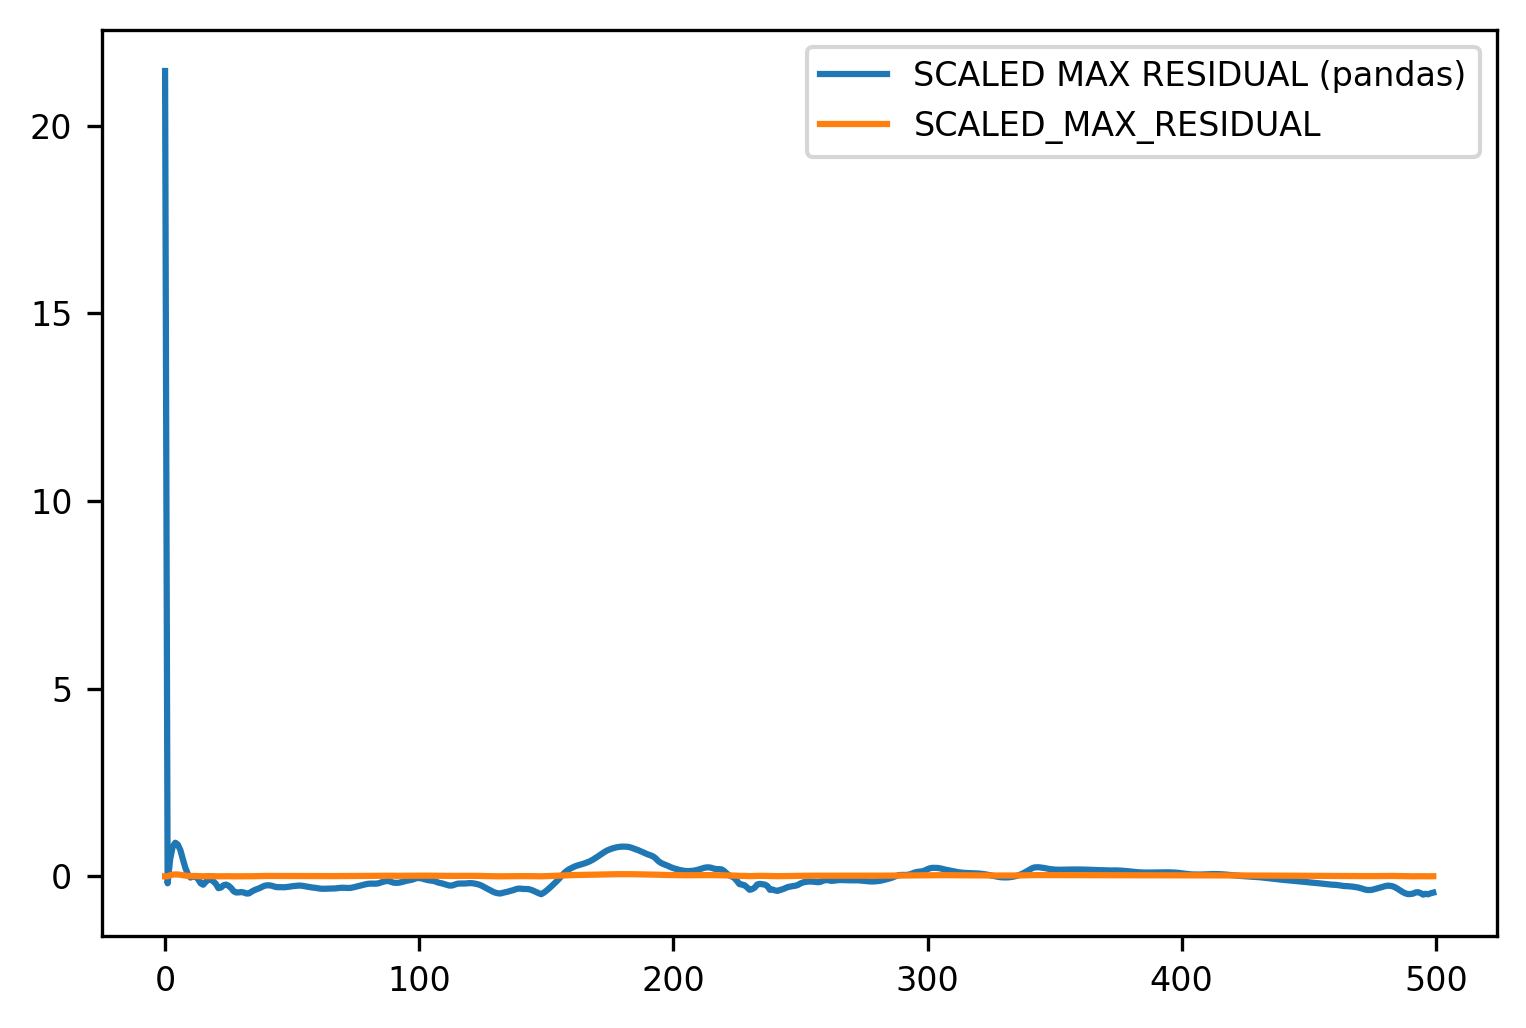

In [5]:
# Scale the residual over the whole interval
residual = data["MAX_RESIDUAL"]
residual_scaled = (residual - residual.mean()) / residual.std()
plt.plot(residual_scaled, label="SCALED MAX RESIDUAL (pandas)")
# Compare with scaling the running max residual signal
plt.plot(data["SCALED_MAX_RESIDUAL"], label="SCALED_MAX_RESIDUAL")
plt.legend()

The running scaled max residual can be used, it seems to work fine.

#### Comparing the scaled MAX RESIDUAL with the scaled MEAN CPU TIME (pandas and running)

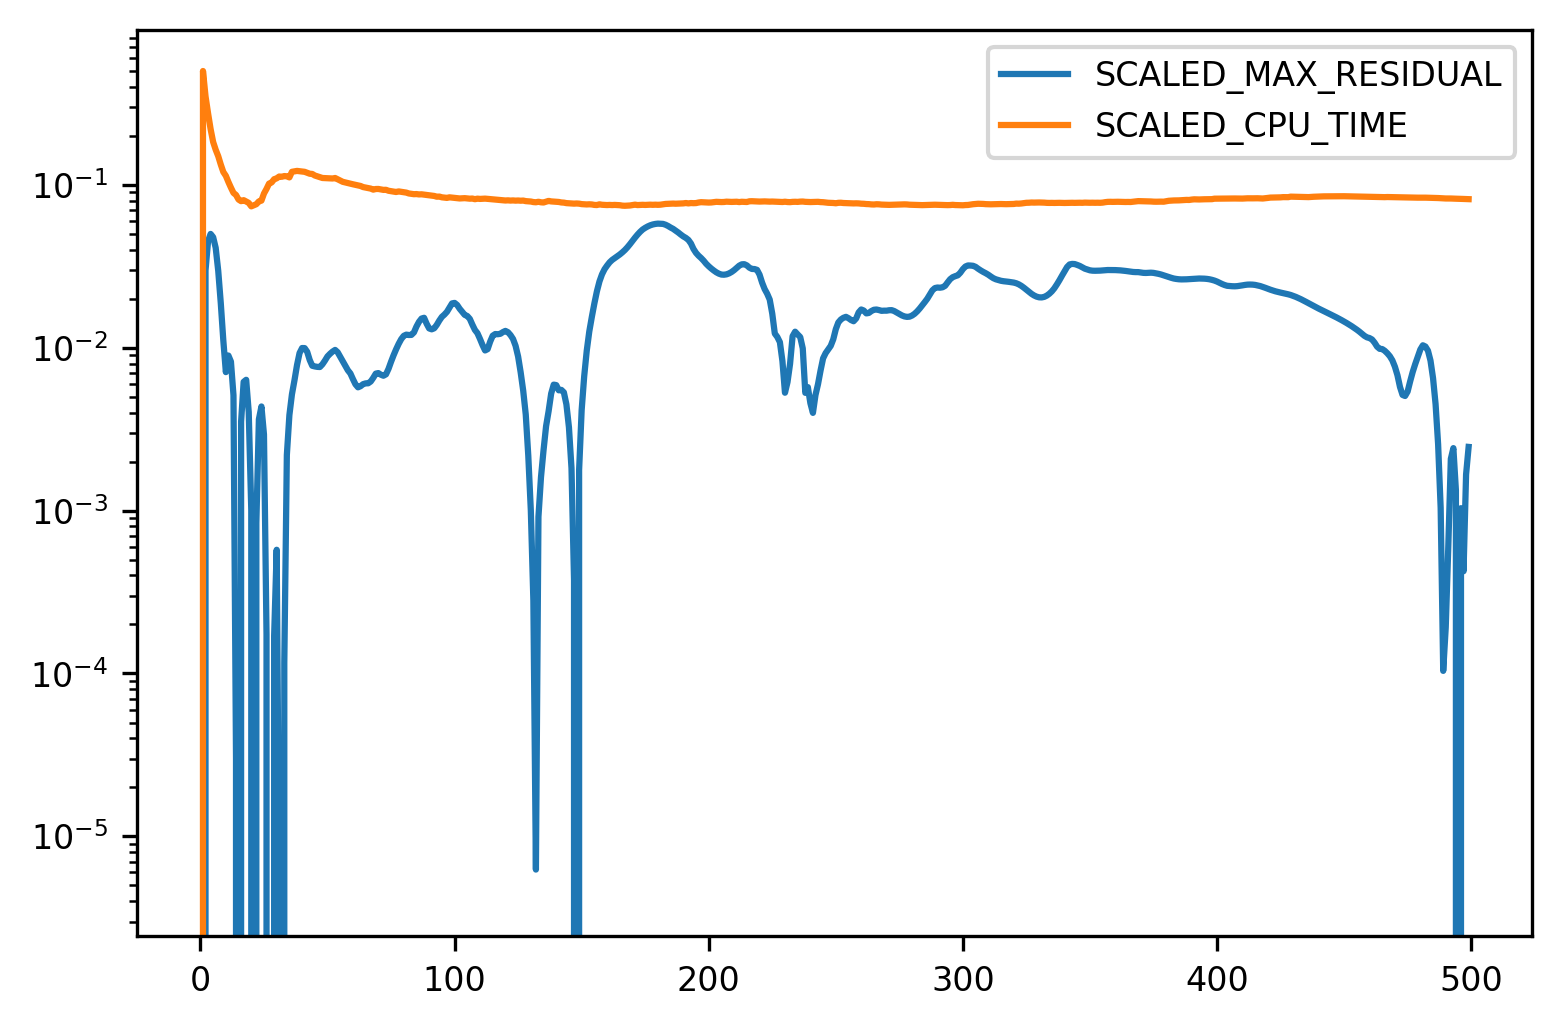

In [8]:
plt.plot(data["SCALED_MAX_RESIDUAL"], label="SCALED_MAX_RESIDUAL")
plt.plot(data["SCALED_CPU_TIME"], label="SCALED_CPU_TIME")
plt.semilogy()
plt.legend()

**The scaled MAX RESIDUAL and scaled MEAN CPU TIME are on a similar scale and can be linearly combined into the reward function.**

## Reward function

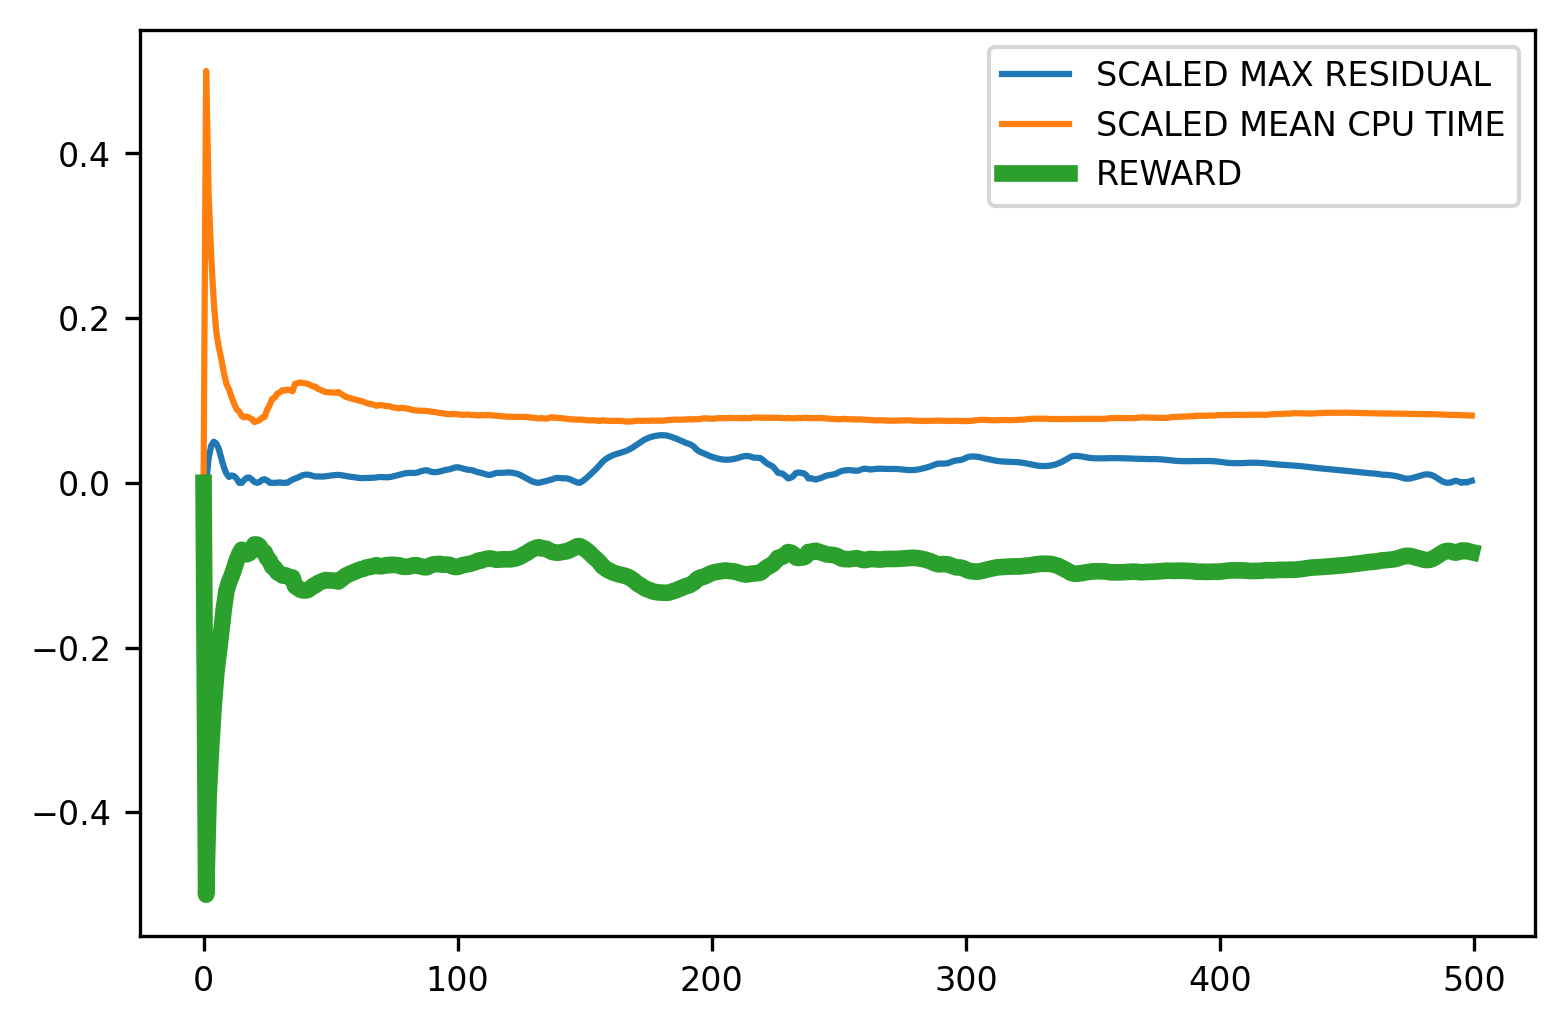

In [7]:
reward = -data["SCALED_MAX_RESIDUAL"] - data["SCALED_CPU_TIME"]
plt.plot(data["SCALED_MAX_RESIDUAL"], label="SCALED MAX RESIDUAL")
plt.plot(data["SCALED_CPU_TIME"], label="SCALED MEAN CPU TIME")
plt.plot(reward, label="REWARD", lw=4)
plt.legend()